In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 as vg, preprocess_input 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [3]:
from PIL import Image as pl
from IPython.display import display
from IPython.display import Image as _Imgdis

In [9]:
def renaming():
    x=0
    path = 'C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/train'
    a1= pd.read_csv('labels.csv')
    for i in os.listdir(path):
        name= i.split('.')[0]
        dogbreed = a1.loc[a1['id'] == name,'breed'].iloc[0]
        x =x+1
        src = f"{path}/{i}"  
        dst = f"{path}/{dogbreed}-{x}.jpg" 
        os.rename(src, dst)    

In [10]:
renaming()

In [40]:
import shutil
import random
def moving(dst,size):
    source = 'C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/train'
    destination = 'C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/' +  dst + '/'
    allfiles = os.listdir(source)
    a=0
    for f in allfiles:
        if(a ==size):
            break;
        a=a+1
        w=random.choice(os.listdir(source))
        shutil.move(f"{source}/{w}", f"{destination}/{w}")

In [42]:
moving("Validation",76)

In [41]:
moving("test 2",1828)

In [4]:
def prepare_df(data_type):
    X = []
    y = []
    path = 'C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/' + data_type + '/'
    a1= pd.read_csv('labels.csv')
    for i in os.listdir(path):
        # Image
        X.append(i)
        # Label 
        name= i.split('-')[0]
        y.append(name)  
    X = np.array(X)
    y = np.array(y)
    
    df = pd.DataFrame()
    df['filename'] = X
    df['label'] = y
    return df
df_train = prepare_df('train')
df_val = prepare_df('Validation')
df_test = prepare_df('test 2')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Generate batches and augment the images
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    directory='C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/train/',
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(224, 224),
)

Found 5222 validated image filenames belonging to 120 classes.


In [6]:
val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
) 

validation_generator =val_datagen.flow_from_dataframe(
    df_val,
    directory="C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/Validation/",
    target_size=(224, 224),
    x_col='filename',
    y_col='label',
    class_mode='categorical')

Found 3000 validated image filenames belonging to 120 classes.


In [15]:
LABELS = df_train['label'].unique()

In [16]:
LABELS

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog', 'black',
       'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie',
       'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres',
       'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel',
       'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever',
       'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly', 'dandie_dinmont', 'dhole', 'dingo', 'doberman',
       'english_foxhound', 'english_setter', 'english_springer',
       'entlebucher', 'eskimo_dog', 'flat', 'french_bulldog',
       'german_shepherd', 'german_short', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'greater_swiss_mountain_dog',
       'great_dane', 'great_pyrenees', 'groenendael', 'ibizan_hound',
 

In [17]:
LABELS.shape

(120,)

In [18]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024,activation="relu",input_shape=(224,224,3)))
model.add(Dropout(0.5))

model.add(Dense(256,activation="relu",input_shape=(224,224,3)))
model.add(Dropout(0.2))

model.add(Dense(len(LABELS),activation="softmax"))

In [19]:
base_model= vg(weights='imagenet',input_shape=(224,224,3),include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
preds=Dense(len(LABELS),activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:-5]:
    layer.trainable=False
for layer in model.layers[-5:]:
    layer.trainable=True
    
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [20]:
early_stopping = EarlyStopping(patience=5, verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)

In [21]:
model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
164/164 [==============================] - 1233s 8s/step - loss: 4.5351 - accuracy: 0.0668 - val_loss: 3.4393 - val_accuracy: 0.1737
Epoch 2/30
164/164 [==============================] - 1178s 7s/step - loss: 3.2798 - accuracy: 0.1850 - val_loss: 2.8202 - val_accuracy: 0.2737
Epoch 3/30
164/164 [==============================] - 1098s 7s/step - loss: 2.8249 - accuracy: 0.2704 - val_loss: 2.5850 - val_accuracy: 0.3027
Epoch 4/30
164/164 [==============================] - 1086s 7s/step - loss: 2.5264 - accuracy: 0.3252 - val_loss: 2.5218 - val_accuracy: 0.3290
Epoch 5/30
164/164 [==============================] - 1080s 7s/step - loss: 2.3325 - accuracy: 0.3696 - val_loss: 2.3692 - val_accuracy: 0.3613
Epoch 6/30
164/164 [==============================] - 1102s 7s/step - loss: 2.1544 - accuracy: 0.4117 - val_loss: 2.3231 - val_accuracy: 0.3673
Epoch 7/30
164/164 [==============================] - 1080s 7s/step - loss: 2.0247 - accuracy: 0.4376 - val_loss: 2.3560 - val_accuracy:

In [63]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
predictions =0
img= Image.open('C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/test 2/affenpinscher-1046.jpg')
for i in os.listdir('C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/test 2'):
    img = Image.open('C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/test 2/' + i)
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, 0)
    predictions = model.predict(img)

1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 242ms/step


1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 269ms/step


1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 258ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 265ms/step


In [61]:
X = []
y = []
path = 'C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/train'
a1= pd.read_csv('labels.csv')
for i in os.listdir(path):
    # Image
    X.append(i)
    # Label 
    name= i.split('-')[0]
    y.append(name)  
X = np.array(X)
y = np.array(y)
df = pd.DataFrame()
df['filename'] = X
df['label'] = y

In [62]:
encoder = LabelBinarizer()

X = np.array(X)
y = encoder.fit_transform(np.array(y))

print(y[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [64]:
label_predictions = encoder.inverse_transform(predictions)

In [65]:
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [49]:
df_test['filename'][0]

'affenpinscher-1046.jpg'

In [66]:
path1='C:/Users/JATIN MALHOTRA/Desktop/FORE documents/DLNLP/Project/dog-breed-identification/test 2'

black-and-tan_coonhound-7509.jpg


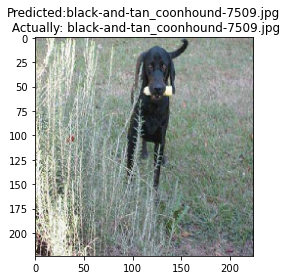

In [97]:
rows, cols = 5, 3
size = 25

#fig,ax=plt.subplots(rows,cols)
#fig.set_size_inches(size,size)
#for i in range(rows):
 #   for j in range (cols):

index = np.random.randint(0,len(df))
image= load_and_preprocess_image(path1+"/"+df_test['filename'][index])
print(df_test['filename'][index])
plt.imshow(image)
plt.title(f'Predicted: {label_predictions[index]}\n Actually: {encoder.inverse_transform(df_test)[index]}')
        
plt.tight_layout()